<a href="https://colab.research.google.com/github/Stergios-Konstantinidis/DMML2022_Nestle/blob/main/DMML2022_Nestle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1305831


#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2022_[your_team_name]` with the following structure:
- data (folder) 
- code (folder) 
- documentation (folder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach, summary of results table and link to the explainatory video (see below).*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using the invitation link we sent on Slack.

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

BE CREATIVE! You can use whatever method you want, in order to climb the leaderboard. The only rule is that it must be your own work. Given that, you can use all the online resources you want. 

#### 5. 🎥 Create a YouTube video (10-15 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. *Select* projects will also be presented live by the group during the last class.


### Submission details (one per team)

1. Download a ZIPped file of your team's repository and submit it in Moodle here. IMPORTANT: in the comment of the submission, insert a link to the repository on Github.
https://moodle.unil.ch/mod/assign/view.php?id=1305833



### Grading (one per team)
- 20% Kaggle Rank
- 50% code quality (using classes, splitting into proper files, documentation, etc)
- 15% github quality (include link to video, table with progress over time, organization of code, images, etc)
- 15% video quality (good sound, good slides, interesting presentation).

## Some further details for points 3 and 4 above.

### 3. Read data into your notebook with the Kaggle API (optional but useful). 

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [ ]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# install Kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### IMPORTANT
Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file. Save it in your Google Drive (not in a folder, in your general drive).

In [ ]:
!mkdir ~/.kaggle

In [ ]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
!mkdir data


In [ ]:
# download the dataset from the competition page
try:
  df = pd.read_csv('/content/data/training_data.csv')
except:
  !kaggle competitions download -c detecting-french-texts-difficulty-level-2022
  !unzip "detecting-french-texts-difficulty-level-2022.zip" -d data

100% 303k/303k [00:00<00:00, 654kB/s]
100% 303k/303k [00:00<00:00, 653kB/s]
Archive:  detecting-french-texts-difficulty-level-2022.zip
  inflating: data/sample_submission.csv  
  inflating: data/training_data.csv  
  inflating: data/unlabelled_test_data.csv  


In [ ]:
# read in your training data
import pandas as pd
import numpy as np
import sklearn 
import sklearn.model_selection

df = pd.read_csv('/content/data/training_data.csv')

In [ ]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


Have a look at the data on which to make predictions.

In [ ]:
df_pred = pd.read_csv('/content/data/unlabelled_test_data.csv')
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.

In [ ]:
df_example_submission = pd.read_csv('/content/data/sample_submission.csv')
df_example_submission.head()

,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1


### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 4.1.Baseline
What is the baseline for this classification problem?

In [ ]:
np.random.seed = 0

In [ ]:
#Split data set

X= df['sentence']
y= df['difficulty']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)


#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [ ]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
texts = df['sentence']
tfidf = TfidfVectorizer(ngram_range=(1, 1))
features = tfidf.fit_transform(texts)
pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,02h00,03h00,10,100,1000,10000,105,11,110,...,événement,événements,êtes,être,êtres,êut,île,îles,ôta,ôter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.200821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(X_train.reset_index())

      index                                           sentence
0        70                            Comment t'appelles-tu ?
1      4347  Voilà qui serait en effet de nature à simplifi...
2      1122  Les pèlerins partagèrent alors cette célébrati...
3      4570                        Qu'est-ce que vous faites ?
4        34  En voici un des moins obscurs : "Plus nous dev...
...     ...                                                ...
3835   1033  Les micro-changements apportés par ce type d'u...
3836   3264  J'allais à la poste quand j'ai croisé ma cousi...
3837   1653  Au cours des années 1970 et 1980, plusieurs gr...
3838   2607  Stop : tout d'abord, figurez-vous que les vrai...
3839   2732  "On s'est alors dit que le terrain commençait ...

[3840 rows x 2 columns]


In [ ]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

text_transformer = TfidfVectorizer(stop_words= list(fr_stop), ngram_range=(1, 2), lowercase=True, max_features=150000)
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

In [ ]:
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

Calculate accuracy, precision, recall and F1 score on the test set.

In [ ]:
# train accuracy with CV
#with normalization

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

LR_cv = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=100, random_state = 50)

LR_cv.fit(X_train_text, y_train)

LR_cv.score(X_train_text, y_train)

LR_accur_train = LR_cv.score(X_train_text, y_train)

LR_accur_train

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

LR_cv.score(X_train_text, y_train)

LR_accur_train = LR_cv.score(X_train_text, y_train)

LR_accur_train

0.9880208333333333

In [ ]:
y_pred = LR_cv.predict(X_test_text)
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))


Precision Score :  0.41041666666666665
Recall Score :  0.41041666666666665


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
def evaluate(test, pred):
  f1= f1_score(test, pred,average='micro')
  print(f'CONFUSION MATRIX:\n{confusion_matrix(test, pred )}')
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[74 46 20  8  6  7]
 [53 58 27 11  6  9]
 [26 31 57 13 12 21]
 [ 7 15 24 57 19 22]
 [ 8 15 16 32 65 37]
 [12 11  6 20 26 83]]


Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

In [ ]:
#Confusion Matrix
y_pred = LR_cv.predict(X_test_text)

def evaluate(test, pred):
  f1= f1_score(test, pred)
  print(f'CONFUSION MATRIX:\n{confusion_matrix(test, pred)}')
evaluate(y_test, y_pred)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.4g');

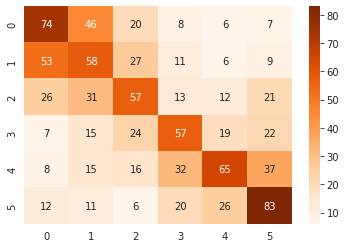

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.4g');

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
# your code here

Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [ ]:
# your code here

#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
# your code here

Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [ ]:
# your code here

#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
# your code here

#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [ ]:
# your code here

#### 4.7. Show a summary of your results